In [1]:
import pandas as pd
import numpy as np
import geopandas as gp
#import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_excel('National Database for WSS Access.xlsx', header=5)
df = df.iloc[3:1376,:10]
df = df.reset_index(drop=True)
df = df.drop(columns=['RANK'])
df.head()

,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,WITH ACCESS TO SAFE WATER SOURCE
0,CARABRABANGUED (Capital),1.0,CAR,ABRA,BANGUED (Capital),1ST,48163.0,8027.166667,7020
1,CARABRABOLINEY,2.0,CAR,ABRA,BOLINEY,5TH,3573.0,595.500000,595.5
2,CARABRABUCAY,3.0,CAR,ABRA,BUCAY,5TH,17115.0,2852.500000,2599.5
3,CARABRABUCLOC,4.0,CAR,ABRA,BUCLOC,6TH,2501.0,416.833333,415.833
4,CARABRADAGUIOMAN,5.0,CAR,ABRA,DAGUIOMAN,5TH,2088.0,348.000000,348


In [3]:
df['TOTAL POPULATION (PSA 2015)'].sum()

56800128.0

In [4]:
df.columns

Index(['JCODE', 'NO.', 'Region', 'Province', 'City/Municipality',
       ' INCOME CLASS', 'TOTAL POPULATION (PSA 2015)', 'TOTAL HHs',
       'WITH ACCESS TO SAFE WATER SOURCE'],
      dtype='object')

In [5]:
df.columns = df.columns.str.replace(' INCOME CLASS', 'INCOME CLASS')
df.columns = df.columns.str.replace('WITH ACCESS TO SAFE WATER SOURCE', 'HHs WITH ACCESS')

In [6]:
#Checking for missing values
df.isna().sum()

JCODE                          0
NO.                            0
Region                         0
Province                       0
City/Municipality              0
INCOME CLASS                   0
TOTAL POPULATION (PSA 2015)    0
TOTAL HHs                      0
HHs WITH ACCESS                0
dtype: int64

In [7]:
df.shape

(1373, 9)

Cleaning column values

In [8]:
df['INCOME CLASS'].unique().tolist()

['1ST', '5TH', '6TH', '2ND', '4TH', '3RD', '1ND']

In [9]:
df[df['INCOME CLASS']=='1ND']

,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS
255,REGION IIISABELASAN PABLO,256.0,REGION II,ISABELA,SAN PABLO,1ND,25384.0,4230.666667,1077


Based on DILG Website, San Pablo City is Income Class: 1

In [10]:
df['INCOME CLASS'].replace('1ND','1ST',inplace=True)
df['INCOME CLASS'].unique().tolist()

['1ST', '5TH', '6TH', '2ND', '4TH', '3RD']

In [11]:
df['INCOME CLASS'] = df['INCOME CLASS'].str.extract('(\d+)', expand=False)
df.head()

,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS
0,CARABRABANGUED (Capital),1.0,CAR,ABRA,BANGUED (Capital),1,48163.0,8027.166667,7020
1,CARABRABOLINEY,2.0,CAR,ABRA,BOLINEY,5,3573.0,595.500000,595.5
2,CARABRABUCAY,3.0,CAR,ABRA,BUCAY,5,17115.0,2852.500000,2599.5
3,CARABRABUCLOC,4.0,CAR,ABRA,BUCLOC,6,2501.0,416.833333,415.833
4,CARABRADAGUIOMAN,5.0,CAR,ABRA,DAGUIOMAN,5,2088.0,348.000000,348


In [12]:
df.iloc[:,5:] = df.iloc[:,5:].astype(float)
df.dtypes

JCODE                           object
NO.                            float64
Region                          object
Province                        object
City/Municipality               object
INCOME CLASS                   float64
TOTAL POPULATION (PSA 2015)    float64
TOTAL HHs                      float64
HHs WITH ACCESS                float64
dtype: object

Add additional columns

In [13]:
df['HHs WITHOUT ACCESS'] = df['TOTAL HHs'] - df['HHs WITH ACCESS']
df['% HHs WITHOUT ACCESS'] = df['HHs WITHOUT ACCESS']/df['TOTAL HHs']
df['HH Size'] = df['TOTAL POPULATION (PSA 2015)']/df['TOTAL HHs']
df['POPULATION WITH ACCESS'] = df['HHs WITH ACCESS']*df['HH Size']
df['POPULATION WITHOUT ACCESS'] = df['TOTAL POPULATION (PSA 2015)'] - df['POPULATION WITH ACCESS']
df['%'] = df['POPULATION WITHOUT ACCESS'] / df['TOTAL POPULATION (PSA 2015)']
df.head()

,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
0,CARABRABANGUED (Capital),1.0,CAR,ABRA,BANGUED (Capital),1.0,48163.0,8027.166667,7020.000000,1007.166667,0.125470,6.0,42120.0,6043.0,0.125470
1,CARABRABOLINEY,2.0,CAR,ABRA,BOLINEY,5.0,3573.0,595.500000,595.500000,0.000000,0.000000,6.0,3573.0,0.0,0.000000
2,CARABRABUCAY,3.0,CAR,ABRA,BUCAY,5.0,17115.0,2852.500000,2599.500000,253.000000,0.088694,6.0,15597.0,1518.0,0.088694
3,CARABRABUCLOC,4.0,CAR,ABRA,BUCLOC,6.0,2501.0,416.833333,415.833333,1.000000,0.002399,6.0,2495.0,6.0,0.002399
4,CARABRADAGUIOMAN,5.0,CAR,ABRA,DAGUIOMAN,5.0,2088.0,348.000000,348.000000,0.000000,0.000000,6.0,2088.0,0.0,0.000000


In [14]:
df['HH Size'].unique()

array([6., 5., 4.])

In [15]:
df.sum(axis=0)[6:]

TOTAL POPULATION (PSA 2015)    5.68001e+07
TOTAL HHs                      9.48115e+06
HHs WITH ACCESS                 6.0772e+06
HHs WITHOUT ACCESS             3.40396e+06
% HHs WITHOUT ACCESS               456.327
HH Size                               8221
POPULATION WITH ACCESS          3.6413e+07
POPULATION WITHOUT ACCESS      2.03871e+07
%                                  456.327
dtype: object

In [16]:
df.iloc[:,2:].sort_values(by='HHs WITHOUT ACCESS',ascending=False).head(10)

,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
515,REGION IVA,RIZAL,RODRIGUEZ (MONTALBAN),1.0,369222.0,61537.000000,22849.0,38688.000000,0.628695,6.0,137094.0,232128.0,0.628695
432,REGION IVA,CAVITE,GENERAL TRIAS,1.0,314303.0,52383.833333,17681.0,34702.833333,0.662472,6.0,106086.0,208217.0,0.662472
319,REGION III,BULACAN,SANTA MARIA,1.0,256454.0,42742.333333,18937.0,23805.333333,0.556950,6.0,113622.0,142832.0,0.556950
442,REGION IVA,CAVITE,TANZA,1.0,226188.0,37698.000000,14264.0,23434.000000,0.621624,6.0,85584.0,140604.0,0.621624
516,REGION IVA,RIZAL,SAN MATEO,1.0,252527.0,42087.833333,21695.0,20392.833333,0.484530,6.0,130170.0,122357.0,0.484530
309,REGION III,BULACAN,MARILAO,1.0,221965.0,36994.166667,17518.0,19476.166667,0.526466,6.0,105108.0,116857.0,0.526466
1272,REGION XII,COTABATO (NORTH COTABATO),MIDSAYAP,1.0,151684.0,25280.666667,8456.0,16824.666667,0.665515,6.0,50736.0,100948.0,0.665515
1275,REGION XII,COTABATO (NORTH COTABATO),PIKIT,1.0,154441.0,25740.166667,10651.0,15089.166667,0.586211,6.0,63906.0,90535.0,0.586211
440,REGION IVA,CAVITE,ROSARIO,1.0,110706.0,18451.000000,4461.0,13990.000000,0.758224,6.0,26766.0,83940.0,0.758224
169,REGION I,PANGASINAN,MALASIQUI,1.0,130275.0,21712.500000,8785.0,12927.500000,0.595394,6.0,52710.0,77565.0,0.595394


In [17]:
df.iloc[:,2:].sort_values(by='% HHs WITHOUT ACCESS',ascending=False).head(10)

,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
566,MIMAROPA,PALAWAN,MAGSAYSAY,5.0,12196.0,2032.666667,42.0,1990.666667,0.979337,6.0,252.0,11944.0,0.979337
850,REGION VII,BOHOL,PRES. CARLOS P. GARCIA (PITOGO),4.0,23356.0,3892.666667,183.0,3709.666667,0.952989,6.0,1098.0,22258.0,0.952989
553,MIMAROPA,PALAWAN,ARACELI,4.0,14909.0,2484.833333,142.0,2342.833333,0.942853,6.0,852.0,14057.0,0.942853
558,MIMAROPA,PALAWAN,CAGAYANCILLO,6.0,6285.0,1047.500000,68.0,979.500000,0.935084,6.0,408.0,5877.0,0.935084
853,REGION VII,BOHOL,SAN MIGUEL,4.0,24135.0,4022.500000,345.0,3677.500000,0.914232,6.0,2070.0,22065.0,0.914232
113,REGION I,ILOCOS SUR,SAN ILDEFONSO,5.0,7787.0,1297.833333,114.0,1183.833333,0.912161,6.0,684.0,7103.0,0.912161
79,REGION I,ILOCOS NORTE,BANNA (ESPIRITU),4.0,19438.0,3239.666667,300.0,2939.666667,0.907398,6.0,1800.0,17638.0,0.907398
1231,REGION XI,DAVAO DEL NORTE,CARMEN,1.0,74679.0,12446.500000,1186.0,11260.500000,0.904712,6.0,7116.0,67563.0,0.904712
669,REGION V,MASBATE,CAWAYAN,2.0,67033.0,11172.166667,1184.0,9988.166667,0.894022,6.0,7104.0,59929.0,0.894022
1230,REGION XI,DAVAO DEL NORTE,BRAULIO E. DUJALI,4.0,30104.0,5017.333333,563.0,4454.333333,0.887789,6.0,3378.0,26726.0,0.887789


In [18]:
df.iloc[:,2:].sort_values(by='POPULATION WITHOUT ACCESS',ascending=False).head(10)

,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
515,REGION IVA,RIZAL,RODRIGUEZ (MONTALBAN),1.0,369222.0,61537.000000,22849.0,38688.000000,0.628695,6.0,137094.0,232128.0,0.628695
432,REGION IVA,CAVITE,GENERAL TRIAS,1.0,314303.0,52383.833333,17681.0,34702.833333,0.662472,6.0,106086.0,208217.0,0.662472
319,REGION III,BULACAN,SANTA MARIA,1.0,256454.0,42742.333333,18937.0,23805.333333,0.556950,6.0,113622.0,142832.0,0.556950
442,REGION IVA,CAVITE,TANZA,1.0,226188.0,37698.000000,14264.0,23434.000000,0.621624,6.0,85584.0,140604.0,0.621624
516,REGION IVA,RIZAL,SAN MATEO,1.0,252527.0,42087.833333,21695.0,20392.833333,0.484530,6.0,130170.0,122357.0,0.484530
309,REGION III,BULACAN,MARILAO,1.0,221965.0,36994.166667,17518.0,19476.166667,0.526466,6.0,105108.0,116857.0,0.526466
1272,REGION XII,COTABATO (NORTH COTABATO),MIDSAYAP,1.0,151684.0,25280.666667,8456.0,16824.666667,0.665515,6.0,50736.0,100948.0,0.665515
1275,REGION XII,COTABATO (NORTH COTABATO),PIKIT,1.0,154441.0,25740.166667,10651.0,15089.166667,0.586211,6.0,63906.0,90535.0,0.586211
440,REGION IVA,CAVITE,ROSARIO,1.0,110706.0,18451.000000,4461.0,13990.000000,0.758224,6.0,26766.0,83940.0,0.758224
169,REGION I,PANGASINAN,MALASIQUI,1.0,130275.0,21712.500000,8785.0,12927.500000,0.595394,6.0,52710.0,77565.0,0.595394


In [19]:
df.iloc[:,2:].sort_values(by='%',ascending=False).head(10)

,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
566,MIMAROPA,PALAWAN,MAGSAYSAY,5.0,12196.0,2032.666667,42.0,1990.666667,0.979337,6.0,252.0,11944.0,0.979337
850,REGION VII,BOHOL,PRES. CARLOS P. GARCIA (PITOGO),4.0,23356.0,3892.666667,183.0,3709.666667,0.952989,6.0,1098.0,22258.0,0.952989
553,MIMAROPA,PALAWAN,ARACELI,4.0,14909.0,2484.833333,142.0,2342.833333,0.942853,6.0,852.0,14057.0,0.942853
558,MIMAROPA,PALAWAN,CAGAYANCILLO,6.0,6285.0,1047.500000,68.0,979.500000,0.935084,6.0,408.0,5877.0,0.935084
853,REGION VII,BOHOL,SAN MIGUEL,4.0,24135.0,4022.500000,345.0,3677.500000,0.914232,6.0,2070.0,22065.0,0.914232
113,REGION I,ILOCOS SUR,SAN ILDEFONSO,5.0,7787.0,1297.833333,114.0,1183.833333,0.912161,6.0,684.0,7103.0,0.912161
79,REGION I,ILOCOS NORTE,BANNA (ESPIRITU),4.0,19438.0,3239.666667,300.0,2939.666667,0.907398,6.0,1800.0,17638.0,0.907398
1231,REGION XI,DAVAO DEL NORTE,CARMEN,1.0,74679.0,12446.500000,1186.0,11260.500000,0.904712,6.0,7116.0,67563.0,0.904712
669,REGION V,MASBATE,CAWAYAN,2.0,67033.0,11172.166667,1184.0,9988.166667,0.894022,6.0,7104.0,59929.0,0.894022
1230,REGION XI,DAVAO DEL NORTE,BRAULIO E. DUJALI,4.0,30104.0,5017.333333,563.0,4454.333333,0.887789,6.0,3378.0,26726.0,0.887789


In [20]:
df[df['%']>0.5].groupby('Region').count()

,JCODE,NO.,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
Region,,,,,,,,,,,,,,
CAR,9,9,9,9,9,9,9,9,9,9,9,9,9,9
MIMAROPA,14,14,14,14,14,14,14,14,14,14,14,14,14,14
REGION I,72,72,72,72,72,72,72,72,72,72,72,72,72,72
REGION II,67,67,67,67,67,67,67,67,67,67,67,67,67,67
REGION III,47,47,47,47,47,47,47,47,47,47,47,47,47,47
REGION IVA,32,32,32,32,32,32,32,32,32,32,32,32,32,32
REGION IX,7,7,7,7,7,7,7,7,7,7,7,7,7,7
REGION V,13,13,13,13,13,13,13,13,13,13,13,13,13,13
REGION VI,56,56,56,56,56,56,56,56,56,56,56,56,56,56


In [21]:
df[(df['%']>0.5) & (df['Region']=='REGION III')].groupby('Province').count()

,JCODE,NO.,Region,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
Province,,,,,,,,,,,,,,
AURORA,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BULACAN,8,8,8,8,8,8,8,8,8,8,8,8,8,8
NUEVA ECIJA,11,11,11,11,11,11,11,11,11,11,11,11,11,11
PAMPANGA,5,5,5,5,5,5,5,5,5,5,5,5,5,5
TARLAC,11,11,11,11,11,11,11,11,11,11,11,11,11,11
ZAMBALES,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [22]:
df[df['%']>0.5].count()

JCODE                          360
NO.                            360
Region                         360
Province                       360
City/Municipality              360
INCOME CLASS                   360
TOTAL POPULATION (PSA 2015)    360
TOTAL HHs                      360
HHs WITH ACCESS                360
HHs WITHOUT ACCESS             360
% HHs WITHOUT ACCESS           360
HH Size                        360
POPULATION WITH ACCESS         360
POPULATION WITHOUT ACCESS      360
%                              360
dtype: int64

In [23]:
47/360

0.13055555555555556

In [24]:
df[df['%']<0.5].count()

JCODE                          1013
NO.                            1013
Region                         1013
Province                       1013
City/Municipality              1013
INCOME CLASS                   1013
TOTAL POPULATION (PSA 2015)    1013
TOTAL HHs                      1013
HHs WITH ACCESS                1013
HHs WITHOUT ACCESS             1013
% HHs WITHOUT ACCESS           1013
HH Size                        1013
POPULATION WITH ACCESS         1013
POPULATION WITHOUT ACCESS      1013
%                              1013
dtype: int64

In [25]:
df.describe()

,NO.,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
count,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000
mean,687.000000,3.076475,41369.357611,6905.427531,4426.217609,2479.209922,0.332357,5.987618,26520.748118,14848.609493,0.332357
std,396.495271,1.473520,34822.987802,5801.221744,4002.230460,2952.689952,0.231697,0.123096,24023.128706,17715.662302,0.231697
min,1.000000,1.000000,184.000000,30.666667,30.666667,0.000000,0.000000,4.000000,184.000000,0.000000,0.000000
25%,344.000000,2.000000,20341.000000,3395.666667,1961.000000,525.000000,0.130536,6.000000,11743.000000,3150.000000,0.130536
50%,687.000000,3.000000,32745.000000,5463.833333,3370.000000,1734.666667,0.302742,6.000000,20180.000000,10364.000000,0.302742
75%,1030.000000,4.000000,52732.000000,8788.666667,5601.500000,3443.500000,0.512607,6.000000,33602.000000,20655.000000,0.512607
max,1373.000000,6.000000,369222.000000,61537.000000,48652.000000,38688.000000,0.979337,6.000000,291912.000000,232128.000000,0.979337


In [26]:
df['City/Municipality'].unique().tolist()

['BANGUED (Capital)',
 'BOLINEY',
 'BUCAY',
 'BUCLOC',
 'DAGUIOMAN',
 'DANGLAS',
 'DOLORES',
 'LA PAZ',
 'LACUB',
 'LAGANGILANG',
 'LAGAYAN',
 'LANGIDEN',
 'LICUAN-BAAY (LICUAN)',
 'LUBA',
 'MALIBCONG',
 'MANABO',
 'PEÑARRUBIA',
 'PIDIGAN',
 'PILAR',
 'SALLAPADAN',
 'SAN ISIDRO',
 'SAN JUAN',
 'SAN QUINTIN',
 'TAYUM',
 'TINEG',
 'TUBO',
 'VILLAVICIOSA',
 'CALANASAN (BAYAG)',
 'CONNER',
 'FLORA',
 'KABUGAO (Capital)',
 'LUNA',
 'PUDTOL',
 'SANTA MARCELA',
 'ATOK',
 'BAKUN',
 'BOKOD',
 'BUGUIAS',
 'ITOGON',
 'KABAYAN',
 'KAPANGAN',
 'KIBUNGAN',
 'LA TRINIDAD (Capital)',
 'MANKAYAN',
 'SABLAN',
 'TUBA',
 'TUBLAY',
 'AGUINALDO',
 'ALFONSO LISTA (POTIA)',
 'ASIPULO',
 'BANAUE',
 'HINGYON',
 'HUNGDUAN',
 'KIANGAN',
 'LAGAWE (Capital)',
 'LAMUT',
 'MAYOYAO',
 'TINOC',
 'BALBALAN',
 'LUBUAGAN',
 'PASIL',
 'PINUKPUK',
 'RIZAL (LIWAN)',
 'TANUDAN',
 'TINGLAYAN',
 'BARLIG',
 'BAUKO',
 'BESAO',
 'BONTOC (Capital)',
 'NATONIN',
 'PARACELIS',
 'SABANGAN',
 'SADANGA',
 'SAGADA',
 'TADIAN',
 'ADAMS',


In [27]:
df['City/Municipality']= df['City/Municipality'].str.split('(',n=1).str[0].apply(lambda x: x.rstrip())

In [28]:
df['Province'].unique()

array(['ABRA', 'APAYAO', 'BENGUET', 'IFUGAO', 'KALINGA',
       'MOUNTAIN PROVINCE', 'ILOCOS NORTE', 'ILOCOS SUR', 'LA UNION',
       'PANGASINAN', 'BATANES', 'CAGAYAN', 'ISABELA', 'NUEVA VIZCAYA',
       'QUIRINO', 'AURORA', 'BATAAN', 'BULACAN', 'NUEVA ECIJA',
       'PAMPANGA', 'TARLAC', 'ZAMBALES', 'BATANGAS', 'CAVITE', 'LAGUNA',
       'QUEZON', 'RIZAL', 'MARINDUQUE', 'OCCIDENTAL MINDORO',
       'ORIENTAL MINDORO', 'PALAWAN', 'ROMBLON', 'ALBAY',
       'CAMARINES NORTE', 'CAMARINES SUR', 'CATANDUANES', 'MASBATE',
       'SORSOGON', 'AKLAN', 'ANTIQUE', 'CAPIZ', 'GUIMARAS', 'ILOILO',
       'NEGROS OCCIDENTAL', 'BOHOL', 'CEBU', 'NEGROS ORIENTAL',
       'SIQUIJOR', 'BILIRAN', 'EASTERN SAMAR', 'LEYTE', 'NORTHERN SAMAR',
       'SAMAR (WESTERN SAMAR)', 'SOUTHERN LEYTE', 'ZAMBOANGA DEL NORTE',
       'ZAMBOANGA DEL SUR', 'ZAMBOANGA SIBUGAY', 'BUKIDNON', 'CAMIGUIN',
       'LANAO DEL NORTE', 'MISAMIS OCCIDENTAL', 'MISAMIS ORIENTAL',
       'COMPOSTELA VALLEY', 'DAVAO DEL NORTE', 'DAVAO 

In [29]:
df['Province'].replace('SAMAR (WESTERN SAMAR)', 'SAMAR', inplace=True)
df['Province'].replace('COTABATO (NORTH COTABATO)', 'NORTH COTABATO', inplace=True)

In [30]:
df['CODE'] = df[['Province', 'City/Municipality']].apply(lambda x: ' '.join(x), axis=1)

In [31]:
df['CODE'].unique()

array(['ABRA BANGUED', 'ABRA BOLINEY', 'ABRA BUCAY', ...,
       'SURIGAO DEL SUR SAN MIGUEL', 'SURIGAO DEL SUR TAGBINA',
       'SURIGAO DEL SUR TAGO'], dtype=object)

In [32]:
df

,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%,CODE
0,CARABRABANGUED (Capital),1.0,CAR,ABRA,BANGUED,1.0,48163.0,8027.166667,7020.000000,1007.166667,0.125470,6.0,42120.0,6043.0,0.125470,ABRA BANGUED
1,CARABRABOLINEY,2.0,CAR,ABRA,BOLINEY,5.0,3573.0,595.500000,595.500000,0.000000,0.000000,6.0,3573.0,0.0,0.000000,ABRA BOLINEY
2,CARABRABUCAY,3.0,CAR,ABRA,BUCAY,5.0,17115.0,2852.500000,2599.500000,253.000000,0.088694,6.0,15597.0,1518.0,0.088694,ABRA BUCAY
3,CARABRABUCLOC,4.0,CAR,ABRA,BUCLOC,6.0,2501.0,416.833333,415.833333,1.000000,0.002399,6.0,2495.0,6.0,0.002399,ABRA BUCLOC
4,CARABRADAGUIOMAN,5.0,CAR,ABRA,DAGUIOMAN,5.0,2088.0,348.000000,348.000000,0.000000,0.000000,6.0,2088.0,0.0,0.000000,ABRA DAGUIOMAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,REGION XIIISURIGAO DEL SURMARIHATAG,1369.0,REGION XIII,SURIGAO DEL SUR,MARIHATAG,3.0,18518.0,3086.333333,2936.333333,150.000000,0.048601,6.0,17618.0,900.0,0.048601,SURIGAO DEL SUR MARIHATAG
1369,REGION XIIISURIGAO DEL SURSAN AGUSTIN,1370.0,REGION XIII,SURIGAO DEL SUR,SAN AGUSTIN,4.0,22779.0,3796.500000,2733.000000,1063.500000,0.280126,6.0,16398.0,6381.0,0.280126,SURIGAO DEL SUR SAN AGUSTIN
1370,REGION XIIISURIGAO DEL SURSAN MIGUEL,1371.0,REGION XIII,SURIGAO DEL SUR,SAN MIGUEL,1.0,39340.0,6556.666667,4774.666667,1782.000000,0.271784,6.0,28648.0,10692.0,0.271784,SURIGAO DEL SUR SAN MIGUEL
1371,REGION XIIISURIGAO DEL SURTAGBINA,1372.0,REGION XIII,SURIGAO DEL SUR,TAGBINA,2.0,38833.0,6472.166667,5310.166667,1162.000000,0.179538,6.0,31861.0,6972.0,0.179538,SURIGAO DEL SUR TAGBINA


# Preparing ShapeFile

In [33]:
data = gp.read_file('MuniCities.shp')
data['NAME_1']=data['NAME_1'].apply(lambda x: x.upper())
data['NAME_2']=data['NAME_2'].apply(lambda x: x.upper())
data['CODE'] = data[['NAME_1', 'NAME_2']].apply(lambda x: ' '.join(x), axis=1)
data.describe()

,ID_0,ID_1,ID_2
count,1647.0,1647.000000,1647.000000
mean,177.0,41.703704,824.000000
std,0.0,22.451154,475.592262
min,177.0,1.000000,1.000000
25%,177.0,23.000000,412.500000
50%,177.0,42.000000,824.000000
75%,177.0,60.000000,1235.500000
max,177.0,82.000000,1647.000000


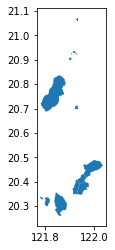

In [34]:
data[data['PROVINCE']=='Batanes'].plot()

In [35]:
data.REGION.unique()

array(['Cordillera Administrative Region (CAR)', 'Caraga (Region XIII)',
       'Cagayan Valley (Region II)', 'Ilocos Region (Region I)',
       'Autonomous Region of Muslim Mindanao (ARMM)',
       'Central Visayas (Region VII)', 'Bicol Region (Region V)',
       'Zamboanga Peninsula (Region IX)', 'Northern Mindanao (Region X)',
       'Western Visayas (Region VI)', 'Central Luzon (Region III)',
       'CALABARZON (Region IV-A)', 'Eastern Visayas (Region VIII)',
       'Davao Region (Region XI)', 'MIMAROPA (Region IV-B)',
       'Metropolitan Manila', 'SOCCSKSARGEN (Region XII)'], dtype=object)

In [36]:
data.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,PROVINCE,REGION,geometry,CODE
0,177,PHL,Philippines,1,ABRA,20,SALLAPADAN,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.81813 17.45325, 120.80331 17.449...",ABRA SALLAPADAN
1,177,PHL,Philippines,1,ABRA,21,SAN ISIDRO,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.62464 17.44141, 120.62530 17.441...",ABRA SAN ISIDRO
2,177,PHL,Philippines,1,ABRA,22,SAN JUAN,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.81137 17.74075, 120.78275 17.714...",ABRA SAN JUAN
3,177,PHL,Philippines,1,ABRA,23,SAN QUINTIN,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.53461 17.53930, 120.53348 17.538...",ABRA SAN QUINTIN
4,177,PHL,Philippines,1,ABRA,24,TAYUM,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.69169 17.63382, 120.69412 17.632...",ABRA TAYUM


# Merging Data

In [37]:
data.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'ID_2', 'NAME_2',
       'NL_NAME_2', 'VARNAME_2', 'TYPE_2', 'ENGTYPE_2', 'PROVINCE', 'REGION',
       'geometry', 'CODE'],
      dtype='object')

In [38]:
df.columns

Index(['JCODE', 'NO.', 'Region', 'Province', 'City/Municipality',
       'INCOME CLASS', 'TOTAL POPULATION (PSA 2015)', 'TOTAL HHs',
       'HHs WITH ACCESS', 'HHs WITHOUT ACCESS', '% HHs WITHOUT ACCESS',
       'HH Size', 'POPULATION WITH ACCESS', 'POPULATION WITHOUT ACCESS', '%',
       'CODE'],
      dtype='object')

In [39]:
df.head()

,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%,CODE
0,CARABRABANGUED (Capital),1.0,CAR,ABRA,BANGUED,1.0,48163.0,8027.166667,7020.000000,1007.166667,0.125470,6.0,42120.0,6043.0,0.125470,ABRA BANGUED
1,CARABRABOLINEY,2.0,CAR,ABRA,BOLINEY,5.0,3573.0,595.500000,595.500000,0.000000,0.000000,6.0,3573.0,0.0,0.000000,ABRA BOLINEY
2,CARABRABUCAY,3.0,CAR,ABRA,BUCAY,5.0,17115.0,2852.500000,2599.500000,253.000000,0.088694,6.0,15597.0,1518.0,0.088694,ABRA BUCAY
3,CARABRABUCLOC,4.0,CAR,ABRA,BUCLOC,6.0,2501.0,416.833333,415.833333,1.000000,0.002399,6.0,2495.0,6.0,0.002399,ABRA BUCLOC
4,CARABRADAGUIOMAN,5.0,CAR,ABRA,DAGUIOMAN,5.0,2088.0,348.000000,348.000000,0.000000,0.000000,6.0,2088.0,0.0,0.000000,ABRA DAGUIOMAN


In [40]:
x = data.merge(df, on='CODE', how='outer')
x = x.drop(columns=['NL_NAME_2','VARNAME_2'])
x.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,PROVINCE,REGION,geometry,CODE,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
0,177.0,PHL,Philippines,1.0,ABRA,20.0,SALLAPADAN,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.81813 17.45325, 120.80331 17.449...",ABRA SALLAPADAN,CARABRASALLAPADAN,20.0,CAR,ABRA,SALLAPADAN,5.0,6622.0,1103.666667,1101.666667,2.000000,0.001812,6.0,6610.0,12.0,0.001812
1,177.0,PHL,Philippines,1.0,ABRA,21.0,SAN ISIDRO,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.62464 17.44141, 120.62530 17.441...",ABRA SAN ISIDRO,CARABRASAN ISIDRO,21.0,CAR,ABRA,SAN ISIDRO,5.0,4574.0,762.333333,672.000000,90.333333,0.118496,6.0,4032.0,542.0,0.118496
2,177.0,PHL,Philippines,1.0,ABRA,22.0,SAN JUAN,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.81137 17.74075, 120.78275 17.714...",ABRA SAN JUAN,CARABRASAN JUAN,22.0,CAR,ABRA,SAN JUAN,5.0,9867.0,1644.500000,987.000000,657.500000,0.399818,6.0,5922.0,3945.0,0.399818
3,177.0,PHL,Philippines,1.0,ABRA,23.0,SAN QUINTIN,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.53461 17.53930, 120.53348 17.538...",ABRA SAN QUINTIN,CARABRASAN QUINTIN,23.0,CAR,ABRA,SAN QUINTIN,5.0,5438.0,906.333333,631.000000,275.333333,0.303788,6.0,3786.0,1652.0,0.303788
4,177.0,PHL,Philippines,1.0,ABRA,24.0,TAYUM,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.69169 17.63382, 120.69412 17.632...",ABRA TAYUM,CARABRATAYUM,24.0,CAR,ABRA,TAYUM,5.0,14467.0,2411.166667,1551.000000,860.166667,0.356743,6.0,9306.0,5161.0,0.356743


In [41]:
x[x.isna().any(axis=1)]

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,PROVINCE,REGION,geometry,CODE,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
9,177.0,PHL,Philippines,2.0,AGUSAN DEL NORTE,29.0,BUTUAN CITY,Lungsod|Siyudad,City,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.65588 9.04878, 125.73537 9.04831...",AGUSAN DEL NORTE BUTUAN CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,177.0,PHL,Philippines,2.0,AGUSAN DEL NORTE,30.0,CABADBARAN CITY,Lungsod|Siyudad,City,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.75833 9.21637, 125.76751 9.16362...",AGUSAN DEL NORTE CABADBARAN CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,177.0,PHL,Philippines,2.0,AGUSAN DEL NORTE,36.0,MAINIT LAKE,Waterbody,Waterbody,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.55842 9.45791, 125.55848 9.45731...",AGUSAN DEL NORTE MAINIT LAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,177.0,PHL,Philippines,37.0,ISABELA,725.0,SANTIAGO CITY,Lungsod|Siyudad,City,Isabela,Cagayan Valley (Region II),"POLYGON ((121.46182 16.80587, 121.47252 16.800...",ISABELA SANTIAGO CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,177.0,PHL,Philippines,38.0,KALINGA,733.0,TABUK CITY,Lungsod|Siyudad,City,Kalinga,Cordillera Administrative Region (CAR),"POLYGON ((121.60453 17.39660, 121.59203 17.370...",KALINGA TABUK CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,DAVAO OCCIDENTAL MALITA,REGION XIDAVAO OCCIDENTALMALITA,1249.0,REGION XI,DAVAO OCCIDENTAL,MALITA,1.0,117746.0,19624.333333,9715.333333,9909.000000,0.504934,6.0,58292.0,59454.0,0.504934
1662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,DAVAO OCCIDENTAL SANTA MARIA,REGION XIDAVAO OCCIDENTALSANTA MARIA,1250.0,REGION XI,DAVAO OCCIDENTAL,SANTA MARIA,2.0,53671.0,8945.166667,4969.000000,3976.166667,0.444504,6.0,29814.0,23857.0,0.444504
1663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,DAVAO OCCIDENTAL SARANGANI,REGION XIDAVAO OCCIDENTALSARANGANI,1251.0,REGION XI,DAVAO OCCIDENTAL,SARANGANI,4.0,24039.0,4006.500000,2934.500000,1072.000000,0.267565,6.0,17607.0,6432.0,0.267565
1664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NORTH COTABATO PIGCAWAYAN,REGION XIICOTABATO (NORTH COTABATO)PIGCAWAYAN,1275.0,REGION XII,NORTH COTABATO,PIGCAWAYAN,1.0,66796.0,11132.666667,6360.000000,4772.666667,0.428708,6.0,38160.0,28636.0,0.428708


In [42]:
x[x['ID_0']!=177.0]['CODE']

1647          NUEVA VIZCAYA ALFONSO CASTAÑEDA
1648              CAVITE GEN. MARIANO ALVAREZ
1649                         PALAWAN KALAYAAN
1650                PALAWAN SOFRONIO ESPAÑOLA
1651                     CAMARINES SUR SAGÑAY
1652                            ILOILO DUEÑAS
1653                       BOHOL ALBURQUERQUE
1654                             BOHOL GETAFE
1655                             CEBU CORDOVA
1656                         SAMAR SANTO NIÑO
1657                ZAMBOANGA DEL NORTE PIÑAN
1658    ZAMBOANGA DEL NORTE SERGIO OSMEÑA SR.
1659           DAVAO OCCIDENTAL DON MARCELINO
1660        DAVAO OCCIDENTAL JOSE ABAD SANTOS
1661                  DAVAO OCCIDENTAL MALITA
1662             DAVAO OCCIDENTAL SANTA MARIA
1663               DAVAO OCCIDENTAL SARANGANI
1664                NORTH COTABATO PIGCAWAYAN
1665                SOUTH COTABATO SANTO NIÑO
Name: CODE, dtype: object

# Inspecting unmatched municipalities

In [43]:
mlist = data['CODE'].unique().tolist()
#Check all entries to be changed by substituting in the string line
for i in mlist:
    if re.search(r"NUEVA VIZCAYA ALFONSO", str(i)):  
        print(i)
    else:
        pass

NUEVA VIZCAYA ALFONSO CASTANEDA


In [44]:
data['CODE'].replace('NUEVA VIZCAYA ALFONSO CASTANEDA', 'NUEVA VIZCAYA ALFONSO CASTAÑEDA', inplace=True)

In [45]:
for i in mlist:
    if re.search(r"CAVITE GEN", str(i)):  
        print(i)
    else:
        pass

CAVITE GENERAL EMILIO AGUINALDO
CAVITE GENERAL MARIANO ALVAREZ
CAVITE GENERAL TRIAS


In [46]:
df['CODE'].replace('CAVITE GEN. MARIANO ALVAREZ', 'CAVITE GENERAL MARIANO ALVAREZ', inplace=True)

In [47]:
for i in mlist:
    if re.search(r"PALAWAN|KALAYAAN", str(i)):  
        print(i)
    else:
        pass

LAGUNA KALAYAAN
PALAWAN ABORLAN
PALAWAN AGUTAYA
PALAWAN ARACELI
PALAWAN BALABAC
PALAWAN BATARAZA
PALAWAN BROOKE'S POINT
PALAWAN BUSUANGA
PALAWAN CAGAYANCILLO
PALAWAN CORON
PALAWAN CULION
PALAWAN CUYO
PALAWAN DUMARAN
PALAWAN EL NIDO
PALAWAN LINAPACAN
PALAWAN MAGSAYSAY
PALAWAN NARRA
PALAWAN PUERTO PRINCESA CITY
PALAWAN QUEZON
PALAWAN RIZAL
PALAWAN ROXAS
PALAWAN SAN VICENTE
PALAWAN SOFRONIO ESPANOLA
PALAWAN TAYTAY


In [48]:
# Kalayaan, Palawan is not included in the shape file

In [49]:
data['CODE'].replace('PALAWAN SOFRONIO ESPANOLA', 'PALAWAN SOFRONIO ESPAÑOLA', inplace=True)

In [50]:
for i in mlist:
    if re.search(r"CAMARINES SUR SAG", str(i)):  
        print(i)
    else:
        pass

CAMARINES SUR SAGNAY


In [51]:
data['CODE'].replace('CAMARINES SUR SAGNAY', 'CAMARINES SUR SAGÑAY', inplace=True)

In [52]:
for i in mlist:
    if re.search(r"ILOILO DUE", str(i)):  
        print(i)
    else:
        pass

ILOILO DUENAS


In [53]:
data['CODE'].replace('ILOILO DUENAS', 'ILOILO DUEÑAS', inplace=True)

In [54]:
for i in mlist:
    if re.search(r"BOHOL ALBU", str(i)):  
        print(i)
    else:
        pass

BOHOL ALBUQUERQUE


In [55]:
data['CODE'].replace('BOHOL ALBUQUERQUE', 'BOHOL ALBURQUERQUE', inplace=True)

In [56]:
for i in mlist:
    if re.search(r"BOHOL", str(i)):  
        print(i)
    else:
        pass

BOHOL ALBUQUERQUE
BOHOL ALICIA
BOHOL ANDA
BOHOL ANTEQUERA
BOHOL BACLAYON
BOHOL BALILIHAN
BOHOL BATUAN
BOHOL BIEN UNIDO
BOHOL BILAR
BOHOL BUENAVISTA
BOHOL CALAPE
BOHOL CANDIJAY
BOHOL CARMEN
BOHOL CATIGBIAN
BOHOL CLARIN
BOHOL CORELLA
BOHOL CORTES
BOHOL DAGOHOY
BOHOL DANAO
BOHOL DAUIS
BOHOL DIMIAO
BOHOL DUERO
BOHOL GARCIA HERNANDEZ
BOHOL GUINDULMAN
BOHOL INABANGA
BOHOL JAGNA
BOHOL JETAFE
BOHOL LILA
BOHOL LOAY
BOHOL LOBOC
BOHOL LOON
BOHOL MABINI
BOHOL MARIBOJOC
BOHOL PANGLAO
BOHOL PILAR
BOHOL PRES. CARLOS P. GARCIA
BOHOL SAGBAYAN
BOHOL SAN ISIDRO
BOHOL SAN MIGUEL
BOHOL SEVILLA
BOHOL SIERRA BULLONES
BOHOL SIKATUNA
BOHOL TAGBILARAN CITY
BOHOL TALIBON
BOHOL TRINIDAD
BOHOL TUBIGON
BOHOL UBAY
BOHOL VALENCIA


In [57]:
data['CODE'].replace('BOHOL JETAFE', 'BOHOL GETAFE', inplace=True)

In [58]:
for i in mlist:
    if re.search(r"CEBU COR", str(i)):  
        print(i)
    else:
        pass

CEBU CORDOBA


In [59]:
data['CODE'].replace('CEBU CORDOBA', 'CEBU CORDOVA', inplace=True)

In [60]:
for i in mlist:
    if re.search(r"SAMAR SANTO", str(i)):  
        print(i)
    else:
        pass

SAMAR SANTO NINO


In [61]:
data['CODE'].replace('SAMAR SANTO NINO', 'SAMAR SANTO NIÑO', inplace=True)

In [62]:
for i in mlist:
    if re.search(r"ZAMBOANGA DEL NORTE PI", str(i)):  
        print(i)
    else:
        pass

ZAMBOANGA DEL NORTE PINAN


In [63]:
data['CODE'].replace('ZAMBOANGA DEL NORTE PINAN', 'ZAMBOANGA DEL NORTE PIÑAN', inplace=True)

In [64]:
for i in mlist:
    if re.search(r"ZAMBOANGA DEL NORTE SER", str(i)):  
        print(i)
    else:
        pass

ZAMBOANGA DEL NORTE SERGIO OSMENA SR.


In [65]:
data['CODE'].replace('ZAMBOANGA DEL NORTE SERGIO OSMENA SR.', 'ZAMBOANGA DEL NORTE SERGIO OSMEÑA SR.', inplace=True)

In [66]:
for i in mlist:
    if re.search(r"DAVAO DEL SUR", str(i)):  
        print(i)
    else:
        pass

DAVAO DEL SUR BANSALAN
DAVAO DEL SUR DAVAO CITY
DAVAO DEL SUR DIGOS CITY
DAVAO DEL SUR DON MARCELINO
DAVAO DEL SUR HAGONOY
DAVAO DEL SUR JOSE ABAD SANTOS
DAVAO DEL SUR KIBLAWAN
DAVAO DEL SUR MAGSAYSAY
DAVAO DEL SUR MALALAG
DAVAO DEL SUR MALITA
DAVAO DEL SUR MATANAO
DAVAO DEL SUR PADADA
DAVAO DEL SUR SANTA CRUZ
DAVAO DEL SUR SANTA MARIA
DAVAO DEL SUR SARANGANI
DAVAO DEL SUR SULOP


In [67]:
data['CODE'].replace('DAVAO DEL SUR DON MARCELINO', 'DAVAO OCCIDENTAL DON MARCELINO', inplace=True)
data['CODE'].replace('DAVAO DEL SUR JOSE ABAD SANTOS', 'DAVAO OCCIDENTAL JOSE ABAD SANTOS', inplace=True)
data['CODE'].replace('DAVAO DEL SUR MALITA', 'DAVAO OCCIDENTAL MALITA', inplace=True)
data['CODE'].replace('DAVAO DEL SUR SANTA MARIA', 'DAVAO OCCIDENTAL SANTA MARIA', inplace=True)
data['CODE'].replace('DAVAO DEL SUR SARANGANI', 'DAVAO OCCIDENTAL SARANGANI', inplace=True)

In [68]:
for i in mlist:
    if re.search(r"NORTH COTABATO PIG", str(i)):  
        print(i)
    else:
        pass

NORTH COTABATO PIGKAWAYAN


In [69]:
data['CODE'].replace('NORTH COTABATO PIGKAWAYAN', 'NORTH COTABATO PIGCAWAYAN', inplace=True)

In [70]:
for i in mlist:
    if re.search(r"SOUTH COTABATO SANTO", str(i)):  
        print(i)
    else:
        pass

SOUTH COTABATO SANTO NINO


In [71]:
data['CODE'].replace('SOUTH COTABATO SANTO NINO', 'SOUTH COTABATO SANTO NIÑO', inplace=True) 

## Merging the two dataframes again

In [204]:
x = data.merge(df, on='CODE', how='outer')
x = x.drop(columns=['NL_NAME_2','VARNAME_2'])
x.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,PROVINCE,REGION,geometry,CODE,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
0,177.0,PHL,Philippines,1.0,ABRA,20.0,SALLAPADAN,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.81813 17.45325, 120.80331 17.449...",ABRA SALLAPADAN,CARABRASALLAPADAN,20.0,CAR,ABRA,SALLAPADAN,5.0,6622.0,1103.666667,1101.666667,2.000000,0.001812,6.0,6610.0,12.0,0.001812
1,177.0,PHL,Philippines,1.0,ABRA,21.0,SAN ISIDRO,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.62464 17.44141, 120.62530 17.441...",ABRA SAN ISIDRO,CARABRASAN ISIDRO,21.0,CAR,ABRA,SAN ISIDRO,5.0,4574.0,762.333333,672.000000,90.333333,0.118496,6.0,4032.0,542.0,0.118496
2,177.0,PHL,Philippines,1.0,ABRA,22.0,SAN JUAN,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.81137 17.74075, 120.78275 17.714...",ABRA SAN JUAN,CARABRASAN JUAN,22.0,CAR,ABRA,SAN JUAN,5.0,9867.0,1644.500000,987.000000,657.500000,0.399818,6.0,5922.0,3945.0,0.399818
3,177.0,PHL,Philippines,1.0,ABRA,23.0,SAN QUINTIN,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.53461 17.53930, 120.53348 17.538...",ABRA SAN QUINTIN,CARABRASAN QUINTIN,23.0,CAR,ABRA,SAN QUINTIN,5.0,5438.0,906.333333,631.000000,275.333333,0.303788,6.0,3786.0,1652.0,0.303788
4,177.0,PHL,Philippines,1.0,ABRA,24.0,TAYUM,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.69169 17.63382, 120.69412 17.632...",ABRA TAYUM,CARABRATAYUM,24.0,CAR,ABRA,TAYUM,5.0,14467.0,2411.166667,1551.000000,860.166667,0.356743,6.0,9306.0,5161.0,0.356743


In [205]:
x[x.isna().any(axis=1)]

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,PROVINCE,REGION,geometry,CODE,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
9,177.0,PHL,Philippines,2.0,AGUSAN DEL NORTE,29.0,BUTUAN CITY,Lungsod|Siyudad,City,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.65588 9.04878, 125.73537 9.04831...",AGUSAN DEL NORTE BUTUAN CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,177.0,PHL,Philippines,2.0,AGUSAN DEL NORTE,30.0,CABADBARAN CITY,Lungsod|Siyudad,City,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.75833 9.21637, 125.76751 9.16362...",AGUSAN DEL NORTE CABADBARAN CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,177.0,PHL,Philippines,2.0,AGUSAN DEL NORTE,36.0,MAINIT LAKE,Waterbody,Waterbody,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.55842 9.45791, 125.55848 9.45731...",AGUSAN DEL NORTE MAINIT LAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,177.0,PHL,Philippines,37.0,ISABELA,725.0,SANTIAGO CITY,Lungsod|Siyudad,City,Isabela,Cagayan Valley (Region II),"POLYGON ((121.46182 16.80587, 121.47252 16.800...",ISABELA SANTIAGO CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,177.0,PHL,Philippines,38.0,KALINGA,733.0,TABUK CITY,Lungsod|Siyudad,City,Kalinga,Cordillera Administrative Region (CAR),"POLYGON ((121.60453 17.39660, 121.59203 17.370...",KALINGA TABUK CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,177.0,PHL,Philippines,80.0,ZAMBOANGA DEL NORTE,1578.0,DAPITAN CITY,Lungsod|Siyudad,City,Zamboanga del Norte,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((123.39240 8.72673, 123.39285 8...",ZAMBOANGA DEL NORTE DAPITAN CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1598,177.0,PHL,Philippines,80.0,ZAMBOANGA DEL NORTE,1579.0,DIPOLOG CITY,Lungsod|Siyudad,City,Zamboanga del Norte,Zamboanga Peninsula (Region IX),"POLYGON ((123.35082 8.63138, 123.35114 8.63091...",ZAMBOANGA DEL NORTE DIPOLOG CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632,177.0,PHL,Philippines,81.0,ZAMBOANGA DEL SUR,1613.0,LAKEWOOD LAKE,Waterbody,Waterbody,Zamboanga del Sur,Zamboanga Peninsula (Region IX),"POLYGON ((123.18555 7.84652, 123.18510 7.84630...",ZAMBOANGA DEL SUR LAKEWOOD LAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1639,177.0,PHL,Philippines,81.0,ZAMBOANGA DEL SUR,1620.0,PAGADIAN CITY,Lungsod|Siyudad,City,Zamboanga del Sur,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((123.43613 7.79296, 123.43587 7...",ZAMBOANGA DEL SUR PAGADIAN CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dealing with Missing Values
Fill missing values to municipalities with the average % population with no access of each province

In [206]:
x.shape

(1648, 28)

In [207]:
x['%'].isna().sum()

275

In [208]:
x.tail()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,PROVINCE,REGION,geometry,CODE,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
1643,177.0,PHL,Philippines,81.0,ZAMBOANGA DEL SUR,1624.0,SAN PABLO,Bayan|Munisipyo,Municipality,Zamboanga del Sur,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((123.45889 7.61583, 123.45917 7...",ZAMBOANGA DEL SUR SAN PABLO,REGION IXZAMBOANGA DEL SURSAN PABLO,1112.0,REGION IX,ZAMBOANGA DEL SUR,SAN PABLO,4.0,26106.0,4351.000000,3140.000000,1211.0,0.278327,6.0,18840.0,7266.0,0.278327
1644,177.0,PHL,Philippines,81.0,ZAMBOANGA DEL SUR,1625.0,SOMINOT,Bayan|Munisipyo,Municipality,Zamboanga del Sur,Zamboanga Peninsula (Region IX),"POLYGON ((123.38792 8.10414, 123.39722 8.08836...",ZAMBOANGA DEL SUR SOMINOT,REGION IXZAMBOANGA DEL SURSOMINOT (DON MARIANO...,1113.0,REGION IX,ZAMBOANGA DEL SUR,SOMINOT,5.0,18537.0,3089.500000,1300.500000,1789.0,0.579058,6.0,7803.0,10734.0,0.579058
1645,177.0,PHL,Philippines,82.0,ZAMBOANGA SIBUGAY,1646.0,TITAY,Bayan|Munisipyo,Municipality,Zamboanga Sibugay,Zamboanga Peninsula (Region IX),"POLYGON ((122.68086 7.88831, 122.68091 7.88682...",ZAMBOANGA SIBUGAY TITAY,REGION IXZAMBOANGA SIBUGAYTITAY,1133.0,REGION IX,ZAMBOANGA SIBUGAY,TITAY,2.0,49673.0,8278.833333,4158.833333,4120.0,0.497655,6.0,24953.0,24720.0,0.497655
1646,177.0,PHL,Philippines,82.0,ZAMBOANGA SIBUGAY,1647.0,TUNGAWAN,Bayan|Munisipyo,Municipality,Zamboanga Sibugay,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.41989 7.49679, 122.42042 7...",ZAMBOANGA SIBUGAY TUNGAWAN,REGION IXZAMBOANGA SIBUGAYTUNGAWAN,1134.0,REGION IX,ZAMBOANGA SIBUGAY,TUNGAWAN,2.0,42030.0,7005.000000,4085.000000,2920.0,0.416845,6.0,24510.0,17520.0,0.416845
1647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,PALAWAN KALAYAAN,MIMAROPAPALAWANKALAYAAN,565.0,MIMAROPA,PALAWAN,KALAYAAN,5.0,184.0,30.666667,30.666667,0.0,0.000000,6.0,184.0,0.0,0.000000


In [209]:
x.at[1647,'PROVINCE'] = 'PALAWAN'
x.at[1647, 'REGION'] = 'MIMAROPA (Region IV-B)'

In [210]:
x['%'] = x.groupby('PROVINCE')['%'].transform(lambda y: y.fillna(y.mean()))
x['% HHs WITHOUT ACCESS'] = x.groupby('PROVINCE')['% HHs WITHOUT ACCESS'].transform(lambda y: y.fillna(y.mean()))

In [211]:
#Checking
x.iloc[9:11, :]

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,PROVINCE,REGION,geometry,CODE,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
9,177.0,PHL,Philippines,2.0,AGUSAN DEL NORTE,29.0,BUTUAN CITY,Lungsod|Siyudad,City,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.65588 9.04878, 125.73537 9.04831...",AGUSAN DEL NORTE BUTUAN CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.182049,NaN,NaN,NaN,0.182049
10,177.0,PHL,Philippines,2.0,AGUSAN DEL NORTE,30.0,CABADBARAN CITY,Lungsod|Siyudad,City,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.75833 9.21637, 125.76751 9.16362...",AGUSAN DEL NORTE CABADBARAN CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.182049,NaN,NaN,NaN,0.182049


In [212]:
x['%'].isna().sum()

134

In [213]:
x1 = x[['PROVINCE','%']]
x1[x1.isnull().any(axis=1)]

,PROVINCE,%
43,Shariff Kabunsuan,NaN
44,Shariff Kabunsuan,NaN
45,Shariff Kabunsuan,NaN
46,Shariff Kabunsuan,NaN
208,Basilan,NaN
...,...,...
1576,Tawi-Tawi,NaN
1577,Tawi-Tawi,NaN
1578,Tawi-Tawi,NaN
1579,Tawi-Tawi,NaN


In [214]:
x1[x1.isnull().any(axis=1)]['PROVINCE'].unique()

array(['Shariff Kabunsuan', 'Basilan', 'Lanao del Sur', 'Maguindanao',
       'Metropolitan Manila', 'Sulu', 'Tawi-Tawi'], dtype=object)

In [215]:
x.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'ID_2', 'NAME_2', 'TYPE_2',
       'ENGTYPE_2', 'PROVINCE', 'REGION', 'geometry', 'CODE', 'JCODE', 'NO.',
       'Region', 'Province', 'City/Municipality', 'INCOME CLASS',
       'TOTAL POPULATION (PSA 2015)', 'TOTAL HHs', 'HHs WITH ACCESS',
       'HHs WITHOUT ACCESS', '% HHs WITHOUT ACCESS', 'HH Size',
       'POPULATION WITH ACCESS', 'POPULATION WITHOUT ACCESS', '%'],
      dtype='object')

In [216]:
x['%'] = x.groupby('REGION')['%'].transform(lambda y: y.fillna(y.mean()))
x['% HHs WITHOUT ACCESS'] = x.groupby('REGION')['% HHs WITHOUT ACCESS'].transform(lambda y: y.fillna(y.mean()))

In [217]:
x['%'].isna().sum()

134

In [218]:
x1 = x[['REGION','PROVINCE','%']]
x1[x1.isnull().any(axis=1)]

,REGION,PROVINCE,%
43,Autonomous Region of Muslim Mindanao (ARMM),Shariff Kabunsuan,NaN
44,Autonomous Region of Muslim Mindanao (ARMM),Shariff Kabunsuan,NaN
45,Autonomous Region of Muslim Mindanao (ARMM),Shariff Kabunsuan,NaN
46,Autonomous Region of Muslim Mindanao (ARMM),Shariff Kabunsuan,NaN
208,Autonomous Region of Muslim Mindanao (ARMM),Basilan,NaN
...,...,...,...
1576,Autonomous Region of Muslim Mindanao (ARMM),Tawi-Tawi,NaN
1577,Autonomous Region of Muslim Mindanao (ARMM),Tawi-Tawi,NaN
1578,Autonomous Region of Muslim Mindanao (ARMM),Tawi-Tawi,NaN
1579,Autonomous Region of Muslim Mindanao (ARMM),Tawi-Tawi,NaN


In [219]:
x1[x1.isnull().any(axis=1)]['REGION'].unique()

array(['Autonomous Region of Muslim Mindanao (ARMM)',
       'Metropolitan Manila'], dtype=object)

Regions ARMM and NCR do not have available data so we will use the average value on the nearest regions.

In [233]:
x.loc[x['REGION']=='Autonomous Region of Muslim Mindanao (ARMM)','%'] = \
                                    x[x['REGION']=='Zamboanga Peninsula (Region IX)']['%'].mean()
x.loc[x['REGION']=='Autonomous Region of Muslim Mindanao (ARMM)','% HHs WITHOUT ACCESS'] = \
                                    x[x['REGION']=='Zamboanga Peninsula (Region IX)']['% HHs WITHOUT ACCESS'].mean()

In [235]:
x.loc[x['REGION']=='Metropolitan Manila','%'] = x[x['REGION']=='CALABARZON (Region IV-A)']['%'].mean()
x.loc[x['REGION']=='Metropolitan Manila','% HHs WITHOUT ACCESS'] = \
                                x[x['REGION']=='CALABARZON (Region IV-A)']['% HHs WITHOUT ACCESS'].mean()

In [236]:
x['%'].isna().sum()

0

In [237]:
x.to_csv('wateraccesswithshp.csv')

In [238]:
df.columns

Index(['JCODE', 'NO.', 'Region', 'Province', 'City/Municipality',
       'INCOME CLASS', 'TOTAL POPULATION (PSA 2015)', 'TOTAL HHs',
       'HHs WITH ACCESS', 'HHs WITHOUT ACCESS', '% HHs WITHOUT ACCESS',
       'HH Size', 'POPULATION WITH ACCESS', 'POPULATION WITHOUT ACCESS', '%',
       'CODE'],
      dtype='object')

In [239]:
x.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'ID_2', 'NAME_2', 'TYPE_2',
       'ENGTYPE_2', 'PROVINCE', 'REGION', 'geometry', 'CODE', 'JCODE', 'NO.',
       'Region', 'Province', 'City/Municipality', 'INCOME CLASS',
       'TOTAL POPULATION (PSA 2015)', 'TOTAL HHs', 'HHs WITH ACCESS',
       'HHs WITHOUT ACCESS', '% HHs WITHOUT ACCESS', 'HH Size',
       'POPULATION WITH ACCESS', 'POPULATION WITHOUT ACCESS', '%'],
      dtype='object')

In [240]:
df_filled = x[['JCODE', 'NO.', 'Region', 'Province', 'City/Municipality',
       'INCOME CLASS', 'TOTAL POPULATION (PSA 2015)', 'TOTAL HHs',
       'HHs WITH ACCESS', 'HHs WITHOUT ACCESS', '% HHs WITHOUT ACCESS',
       'HH Size', 'POPULATION WITH ACCESS', 'POPULATION WITHOUT ACCESS', '%',
       'CODE']]

In [243]:
df_filled.head()

,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%,CODE
0,CARABRASALLAPADAN,20.0,CAR,ABRA,SALLAPADAN,5.0,6622.0,1103.666667,1101.666667,2.000000,0.001812,6.0,6610.0,12.0,0.001812,ABRA SALLAPADAN
1,CARABRASAN ISIDRO,21.0,CAR,ABRA,SAN ISIDRO,5.0,4574.0,762.333333,672.000000,90.333333,0.118496,6.0,4032.0,542.0,0.118496,ABRA SAN ISIDRO
2,CARABRASAN JUAN,22.0,CAR,ABRA,SAN JUAN,5.0,9867.0,1644.500000,987.000000,657.500000,0.399818,6.0,5922.0,3945.0,0.399818,ABRA SAN JUAN
3,CARABRASAN QUINTIN,23.0,CAR,ABRA,SAN QUINTIN,5.0,5438.0,906.333333,631.000000,275.333333,0.303788,6.0,3786.0,1652.0,0.303788,ABRA SAN QUINTIN
4,CARABRATAYUM,24.0,CAR,ABRA,TAYUM,5.0,14467.0,2411.166667,1551.000000,860.166667,0.356743,6.0,9306.0,5161.0,0.356743,ABRA TAYUM


In [244]:
df.head()

,JCODE,NO.,Region,Province,City/Municipality,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%,CODE
0,CARABRABANGUED (Capital),1.0,CAR,ABRA,BANGUED,1.0,48163.0,8027.166667,7020.000000,1007.166667,0.125470,6.0,42120.0,6043.0,0.125470,ABRA BANGUED
1,CARABRABOLINEY,2.0,CAR,ABRA,BOLINEY,5.0,3573.0,595.500000,595.500000,0.000000,0.000000,6.0,3573.0,0.0,0.000000,ABRA BOLINEY
2,CARABRABUCAY,3.0,CAR,ABRA,BUCAY,5.0,17115.0,2852.500000,2599.500000,253.000000,0.088694,6.0,15597.0,1518.0,0.088694,ABRA BUCAY
3,CARABRABUCLOC,4.0,CAR,ABRA,BUCLOC,6.0,2501.0,416.833333,415.833333,1.000000,0.002399,6.0,2495.0,6.0,0.002399,ABRA BUCLOC
4,CARABRADAGUIOMAN,5.0,CAR,ABRA,DAGUIOMAN,5.0,2088.0,348.000000,348.000000,0.000000,0.000000,6.0,2088.0,0.0,0.000000,ABRA DAGUIOMAN


In [245]:
df_filled.isna().sum()

JCODE                          275
NO.                            275
Region                         275
Province                       275
City/Municipality              275
INCOME CLASS                   275
TOTAL POPULATION (PSA 2015)    275
TOTAL HHs                      275
HHs WITH ACCESS                275
HHs WITHOUT ACCESS             275
% HHs WITHOUT ACCESS             0
HH Size                        275
POPULATION WITH ACCESS         275
POPULATION WITHOUT ACCESS      275
%                                0
CODE                             0
dtype: int64

# Saving Edited Files to CSV, SHP

In [246]:
df_filled.to_csv('wateraccess.csv')

In [82]:
data.to_file('muni.shp')

# Plotting

In [83]:
type(x)

geopandas.geodataframe.GeoDataFrame

In [158]:
# x = data.merge(df)
# fig, ax = plt.subplots(1, figsize=(20, 20))
# variable = 'HHs WITHOUT ACCESS'
# x.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax)
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
# plt.savefig('heatmap-hhs.png', dpi=100, transparent=True)

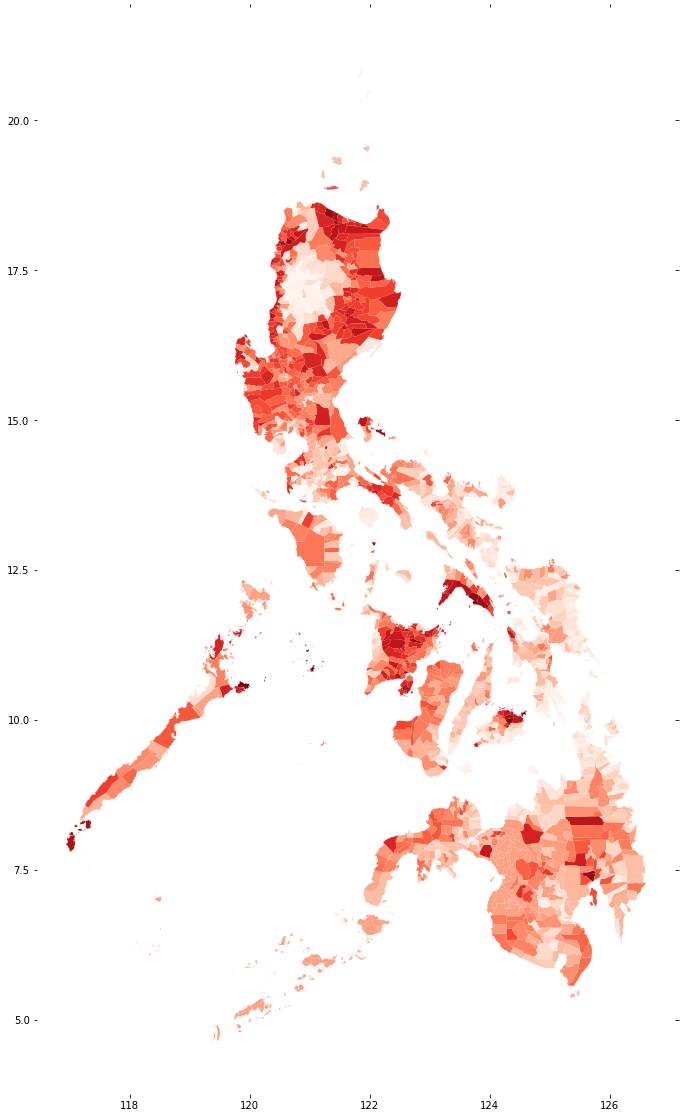

In [247]:
#x = data.merge(df)
fig, ax = plt.subplots(1, figsize=(20, 20))
variable = '% HHs WITHOUT ACCESS'
x.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
plt.savefig('heatmap-%hhs.png', dpi=100, transparent=True)

In [159]:
# fig, ax = plt.subplots(1, figsize=(20, 20))
# variable = 'POPULATION WITHOUT ACCESS'
# x.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax)
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
# plt.savefig('heatmap.png', dpi=100, transparent=True)

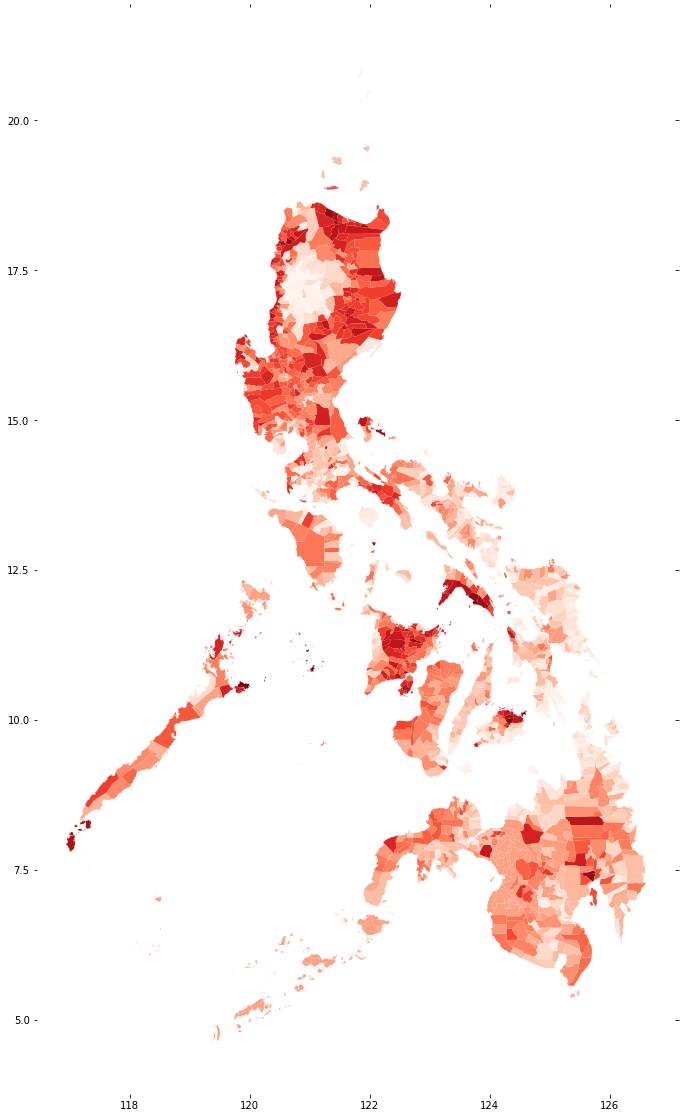

In [248]:
fig, ax = plt.subplots(1, figsize=(20, 20))
variable = '%'
x.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
plt.savefig('heatmap-pct.png', dpi=100, transparent=True)

In [249]:
x.describe()

,ID_0,ID_1,ID_2,NO.,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
count,1647.0,1647.000000,1647.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1648.000000,1373.000000,1373.000000,1373.000000,1648.000000
mean,177.0,41.703704,824.000000,687.000000,3.076475,41369.357611,6905.427531,4426.217609,2479.209922,0.330886,5.987618,26520.748118,14848.609493,0.330886
std,0.0,22.451154,475.592262,396.495271,1.473520,34822.987802,5801.221744,4002.230460,2952.689952,0.215223,0.123096,24023.128706,17715.662302,0.215223
min,177.0,1.000000,1.000000,1.000000,1.000000,184.000000,30.666667,30.666667,0.000000,0.000000,4.000000,184.000000,0.000000,0.000000
25%,177.0,23.000000,412.500000,344.000000,2.000000,20341.000000,3395.666667,1961.000000,525.000000,0.159476,6.000000,11743.000000,3150.000000,0.159476
50%,177.0,42.000000,824.000000,687.000000,3.000000,32745.000000,5463.833333,3370.000000,1734.666667,0.324463,6.000000,20180.000000,10364.000000,0.324463
75%,177.0,60.000000,1235.500000,1030.000000,4.000000,52732.000000,8788.666667,5601.500000,3443.500000,0.481039,6.000000,33602.000000,20655.000000,0.481039
max,177.0,82.000000,1647.000000,1373.000000,6.000000,369222.000000,61537.000000,48652.000000,38688.000000,0.979337,6.000000,291912.000000,232128.000000,0.979337


In [272]:
# temp = pd.DataFrame(new.sum(axis=0))
# temp[6:12]

In [273]:
# new.groupby('Region').sum()

In [252]:
pop = pd.read_csv('PHPopulation.csv', sep=';', encoding='latin-1')

In [253]:
pop.head()

,"Total population by geographic location (based on 2000, 2010 and 2015 Censuses)"
Geographic Location,2015
PHILIPPINES,100981437
..National Capital Region (NCR),12877253
....City of Manila,1780148
....City of Mandaluyong,386276


In [254]:
pop1 = pop[pop.index.str.contains(r'^\.\.\w')]
pop1

,"Total population by geographic location (based on 2000, 2010 and 2015 Censuses)"
..National Capital Region (NCR),12877253
..Cordillera Administrative Region (CAR),1722006
..Region I (Ilocos Region),5026128
..Region II (Cagayan Valley),3451410
..Region III (Central Luzon),11218177
..Region IV-A (Calabarzon),14414774
..Mimaropa Region,2963360
..Region V (Bicol Region),5796989
..Region VI (Western Visayas),4477247
..Region VII (Central Visayas),6041903


In [274]:
# popu = new.groupby('Region').sum()
# popu[['TOTAL POPULATION (PSA 2015)']]

In [145]:
popu.shape

(15, 14)

In [146]:
pop1.shape

(15, 1)

In [147]:
pop1.sum(axis=0)

Total population by geographic location (based on 2000, 2010 and 2015 Censuses)    87231704
dtype: int64

## W4W Impact

In [256]:
df = pd.read_csv('W4Wimpact.csv')
df.head()

,X,Y,People Impacted
0,123.738775,11.198505,1250.0
1,126.043921,9.841525,750.0
2,123.092794,11.198506,250.0
3,120.822020,18.600228,1250.0
4,125.742400,11.032229,750.0


In [257]:
df.dtypes

X                  float64
Y                  float64
People Impacted    float64
dtype: object

In [258]:
df['People Impacted'] = df['People Impacted'].replace(np.nan, 0)

In [259]:
df.isna().sum()

X                  1
Y                  1
People Impacted    0
dtype: int64

In [260]:
df = df.dropna(axis=0)

In [261]:
df.isna().sum()

X                  0
Y                  0
People Impacted    0
dtype: int64

In [262]:
import geopandas
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.X, df.Y))

In [263]:
gdf.head()

,X,Y,People Impacted,geometry
0,123.738775,11.198505,1250.0,POINT (123.73878 11.19851)
1,126.043921,9.841525,750.0,POINT (126.04392 9.84153)
2,123.092794,11.198506,250.0,POINT (123.09279 11.19851)
3,120.822020,18.600228,1250.0,POINT (120.82202 18.60023)
4,125.742400,11.032229,750.0,POINT (125.74240 11.03223)


In [264]:
gdf.shape

(112, 4)

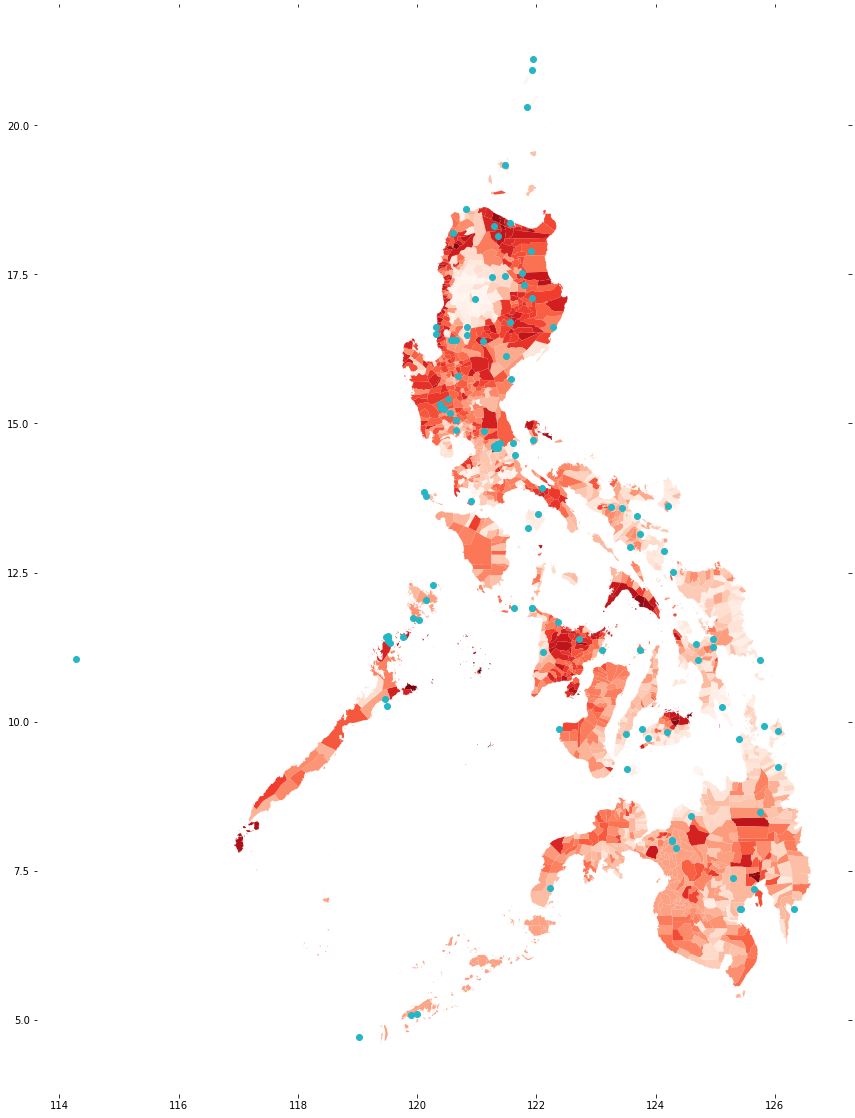

In [265]:
variable = '%'
ax = x.plot(column=variable, cmap='Reds', linewidth=0.8, figsize=(20,20))
gdf.plot(ax=ax, color='#25b6c5')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
plt.savefig('w4w.png', dpi=100, transparent=True)
plt.show()

In [266]:
def within_shape(df, shapes):
    in_shape = []
    for sh in shapes.geometry:
        within = df.within(sh)
        in_shape.append(within)
    return in_shape

In [267]:
shapes = x[x['%']>0.5]
result = within_shape(gdf, shapes)
sum(result).sum()/112

0.20535714285714285

In [268]:
# shapes1 = x[x['POPULATION WITHOUT ACCESS']>20559.750000]
# result = within_shape(gdf, shapes1)
# sum(result).sum()/112

In [269]:
x.describe()

,ID_0,ID_1,ID_2,NO.,INCOME CLASS,TOTAL POPULATION (PSA 2015),TOTAL HHs,HHs WITH ACCESS,HHs WITHOUT ACCESS,% HHs WITHOUT ACCESS,HH Size,POPULATION WITH ACCESS,POPULATION WITHOUT ACCESS,%
count,1647.0,1647.000000,1647.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1648.000000,1373.000000,1373.000000,1373.000000,1648.000000
mean,177.0,41.703704,824.000000,687.000000,3.076475,41369.357611,6905.427531,4426.217609,2479.209922,0.330886,5.987618,26520.748118,14848.609493,0.330886
std,0.0,22.451154,475.592262,396.495271,1.473520,34822.987802,5801.221744,4002.230460,2952.689952,0.215223,0.123096,24023.128706,17715.662302,0.215223
min,177.0,1.000000,1.000000,1.000000,1.000000,184.000000,30.666667,30.666667,0.000000,0.000000,4.000000,184.000000,0.000000,0.000000
25%,177.0,23.000000,412.500000,344.000000,2.000000,20341.000000,3395.666667,1961.000000,525.000000,0.159476,6.000000,11743.000000,3150.000000,0.159476
50%,177.0,42.000000,824.000000,687.000000,3.000000,32745.000000,5463.833333,3370.000000,1734.666667,0.324463,6.000000,20180.000000,10364.000000,0.324463
75%,177.0,60.000000,1235.500000,1030.000000,4.000000,52732.000000,8788.666667,5601.500000,3443.500000,0.481039,6.000000,33602.000000,20655.000000,0.481039
max,177.0,82.000000,1647.000000,1373.000000,6.000000,369222.000000,61537.000000,48652.000000,38688.000000,0.979337,6.000000,291912.000000,232128.000000,0.979337


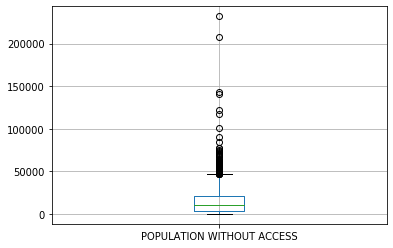

In [270]:
x.boxplot(column=['POPULATION WITHOUT ACCESS'])

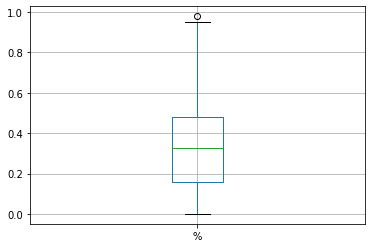

In [271]:
x.boxplot(column=['%'])